Use the advertising dataset given in ISLR and analyse the relationship between 'TV advertising' and 'sales' using a simple linear regression model.

In this notebook, we'll build a linear regression model to predict Sales using an appropriate predictor variable.

The goal of this project is to develop a machine learning model using Python to predict future sales based on historical data and relevant features. 
By leveraging machine learning techniques, we aim to analyze and interpret data to provide actionable insights for businesses.

In [52]:
import pandas as pd
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns

In [53]:
ad = pd.read_csv(r"C:\Users\yoges\Downloads\advertising.csv")

In [54]:
ad.head(10) # Target Variable is Sales. 

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [55]:
ad.shape

(200, 4)

In [56]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [57]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [61]:
# Outlier Analysis

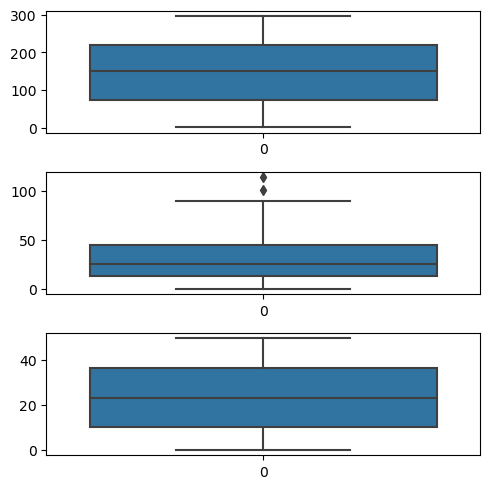

In [58]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(ad['TV'], ax = axs[0])
plt2 = sns.boxplot(ad['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(ad['Radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

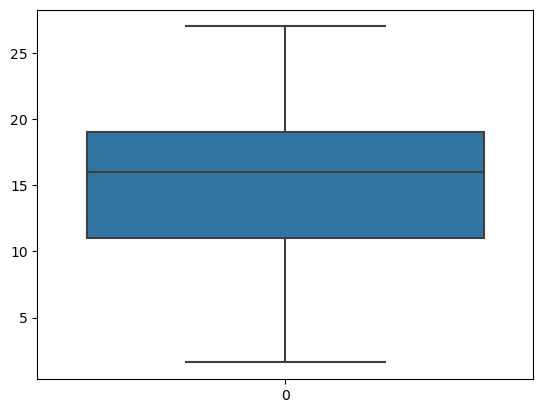

In [59]:
sns.boxplot(ad['Sales'])
plt.show()

C:\Users\yoges\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


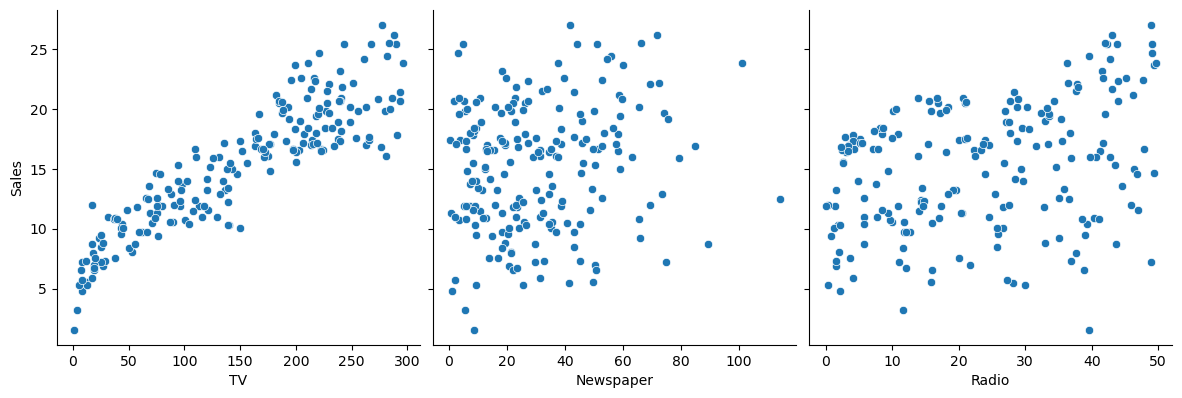

In [60]:
sns.pairplot(ad, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Model Building

***Sampling (train Test data)***

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
ad_train, ad_test = train_test_split(ad , test_size=.2)

In [11]:
ad_train_x = ad_train.iloc[: ,0:-1]
ad_train_y = ad_train.iloc[: , -1]

In [13]:
ad_test_x = ad_test.iloc[: ,0:-1]
ad_test_y = ad_test.iloc[: , -1]

In [21]:
ad_train_x.head()

,TV,Radio,Newspaper
172,19.6,20.1,17.0
92,217.7,33.5,59.0
146,240.1,7.3,8.7
80,76.4,26.7,22.3
157,149.8,1.3,24.3


In [22]:
ad_test_y.head()

102    19.8
113    20.9
37     14.7
58     23.8
13     13.7
Name: Sales, dtype: float64

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linereg = LinearRegression()

In [27]:
linereg.fit(ad_train_x , ad_train_y)

LinearRegression()

In [29]:
Rsquare = linereg.score(ad_train_x , ad_train_y) * 100
Rsquare

91.92000171146726

In [30]:
# Adj_Rsquare = 1-[(1-Rsquare) * (N-1) / N-k-1]

# we have already know Rsquare
# we have to define'N' & 'K' overhere
# K = no.of Columns
# N = no.of rows

In [32]:
N = ad_train_x.shape[0] # Rows
K = ad_train_x.shape[1] # Columns

In [33]:
Adj_Rsquare = 1-(1-Rsquare) * (N-1) / (N-K-1)
Adj_Rsquare

93.66846328284163

In [34]:
ad_train_x.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [35]:
linereg.coef_ 

array([0.05404336, 0.10554693, 0.00173843])

In [36]:
linereg.intercept_ 

4.5969732392794445

# Prediction

In [37]:
pred_train = linereg.predict(ad_train_x)
pred_test = linereg.predict(ad_test_x)
pred_test 

array([20.84314928, 18.11732961, 13.92747692, 21.28998025, 10.68087427,
       12.24621444, 24.62218644, 17.77641965, 24.7954911 ,  8.82958643,
       10.11298101, 13.82273625, 14.97464741,  9.92955293, 17.09442884,
       12.49178252, 23.65279395, 12.10747559, 17.15664221,  6.9253812 ,
       19.83472983,  9.30911617, 16.9898717 , 12.09536356, 15.60944396,
       17.9493847 , 12.40391281, 21.06234999, 14.01303797, 21.97433406,
       18.93295881, 18.06326518, 10.21911905,  9.8275844 , 20.7325077 ,
       11.71887216, 16.84949997, 19.22605626, 15.88322218, 13.34901449])

In [38]:
err_test = ad_test_y - pred_test

In [39]:
err_test

102   -1.043149
113    2.782670
37     0.772523
58     2.510020
13     3.019126
73    -1.246214
101   -0.822186
165   -0.876420
175    2.204509
130   -7.229586
136   -0.612981
114    0.777264
87     1.025353
34     1.970447
85     3.105571
164   -0.591783
36     1.747206
151   -0.507476
100   -0.456642
189   -0.225381
178   -3.034730
65     1.990884
154    3.610128
71     0.304636
4      2.290556
40    -1.349385
186   -2.103913
33    -3.662350
57    -0.813038
47     1.225666
141    0.267041
199    0.336735
196    3.780881
191    2.072416
84     0.967492
79    -0.718872
95     0.050500
139    1.473944
160    0.516778
180    2.150986
Name: Sales, dtype: float64

In [40]:
mse = np.mean(np.square(err_test))
mse

4.627777978309806

In [41]:
rmse = np.sqrt(mse)
rmse

2.1512270866437615

In [42]:
mape = np.mean(np.abs(err_test * 100/ad_test_y))
mape

20.53592582801839

In [43]:
# The Linear Regression model has been Builded on advertising data Successfully.

In [44]:
# Lets check the Assumptions.
# assumptions on the train data.

In [45]:
err_train = ad_train_y - pred_train
err_train

172   -0.207270
92    -0.600602
146   -0.158401
80     0.217244
157   -2.772123
137   -1.742732
176   -1.044151
52     1.837895
48     1.169986
128    3.019912
38     0.294636
96     1.044388
153   -2.110353
115    0.158613
16     0.177688
42    -2.690883
11    -1.340163
118    0.477411
6      0.592741
187   -0.685496
173    2.230490
44    -0.241292
83     0.547734
81    -0.753462
23     1.735638
86     0.349163
91     0.941698
64    -0.249707
78    -2.761002
168   -1.728954
104   -0.399575
149    0.328366
8     -0.485133
26    -0.434199
144    0.874336
110    0.636330
94    -0.397836
14    -0.179685
131   -1.610111
119   -0.772932
111    0.089632
177    2.020388
135   -0.582750
181    0.176966
22    -1.474768
155   -2.852804
49     0.188653
75    -1.578123
124   -0.838082
20    -1.416525
88     0.711951
138   -0.090141
142    0.016421
188   -0.626909
35    -2.954897
55     3.035478
59    -0.713711
62     1.487014
147    2.410869
194    0.844834
103    3.101754
68    -1.448530
156    0

In [46]:
np.mean(err_train)

-3.885780586188048e-16

In [47]:
# assumption - Error should be normally distributed

In [48]:
import matplotlib.pyplot as plt

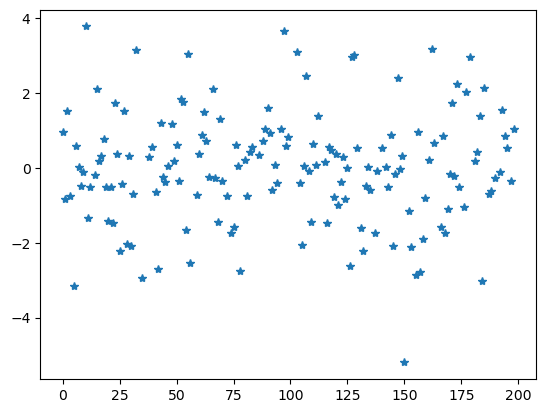

In [49]:
plt.plot(err_train, '*') # (*) = Marker

(array([ 1.,  0.,  0.,  0.,  3.,  6.,  5.,  8.,  9., 11., 23., 23., 25.,
        16.,  8.,  6.,  6.,  1.,  7.,  2.]),
 array([-5.19836879, -4.74962443, -4.30088007, -3.85213571, -3.40339134,
        -2.95464698, -2.50590262, -2.05715826, -1.6084139 , -1.15966954,
        -0.71092518, -0.26218082,  0.18656355,  0.63530791,  1.08405227,
         1.53279663,  1.98154099,  2.43028535,  2.87902971,  3.32777408,
         3.77651844]),
 <BarContainer object of 20 artists>)

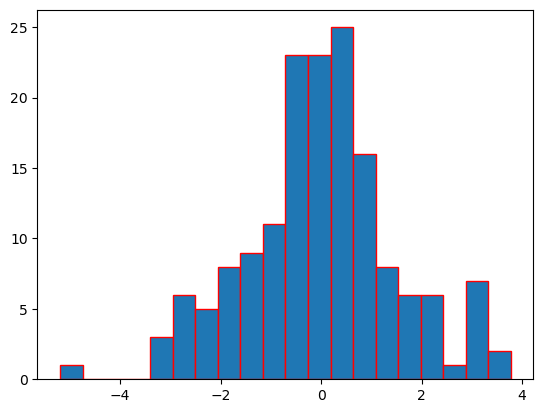

In [62]:
plt.hist(err_train, bins=20, edgecolor='r')

In [63]:
pred_actual_df = pd.DataFrame()

In [64]:
pred_actual_df['Actual'] = ad_train_y
pred_actual_df['Predicted'] = pred_train

In [65]:
pred_actual_df

,Actual,Predicted
172,7.6,7.807270
92,19.4,20.000602
146,18.2,18.358401
80,11.8,11.582756
157,10.1,12.872123
137,20.8,22.542732
176,20.2,21.244151
52,22.6,20.762105
48,19.8,18.630014
128,24.7,21.680088


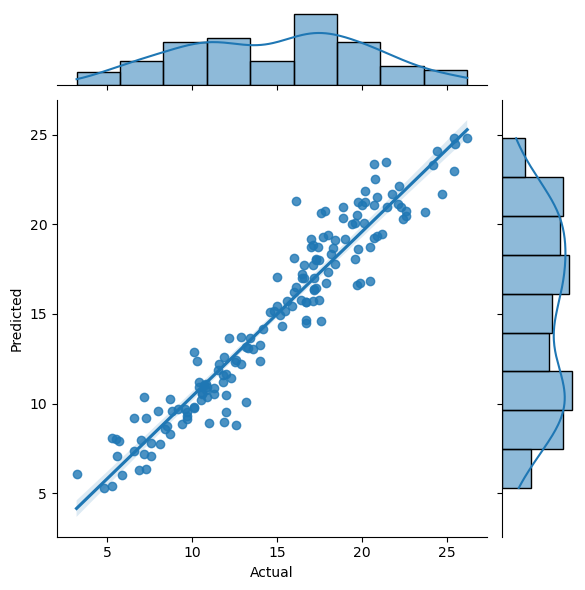

In [66]:
sns.jointplot(x ='Actual', y ='Predicted', data = pred_actual_df, kind='reg' )

In [67]:
def remove_Outliers(df,col,k):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean - k * sd)]
    df1=df.loc[df[col].isin(final_list)]; print(df1.shape)
    print('Number of Outliers removed--->',df.shape[0]-df1.shape[0])

In [68]:
remove_Outliers(ad, 'Sales',2)

(0, 4)
Number of Outliers removed---> 200


# Results :

Rsquare = 91.92

Adj_Rsquare = 93.66

mse = 4.62

rmse = 2.15

mape = 20.53

- Mean Squared Error (MSE): Measures how close the model's predictions are to the actual sales values. Lower MSE values 
  indicate better prediction accuracy.

- Coefficients: Show the impact of each feature on sales prediction. Positive coefficients suggest a positive relationship 
  with sales, while negative coefficients suggest a negative relationship.
  [linereg.coef_  : array([0.05404336, 0.10554693, 0.00173843])]

- Intercept: Represents the expected sales value when all predictor variables are zero. It sets the baseline for sales prediction.
  [linereg.intercept_ 4.5969]


# Conclusion :

linear regression model helps understand how factors like advertising expenditure affect sales. By using this model,
businesses can optimize advertising strategies to increase revenue. Continuous monitoring and refinement are 
crucial for maintaining accuracy in a changing business landscape.